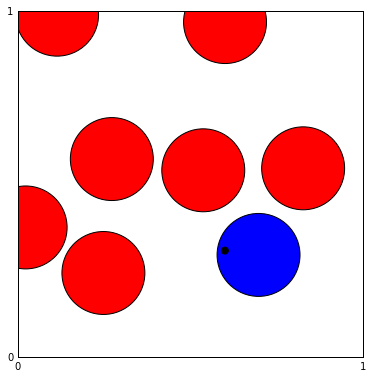

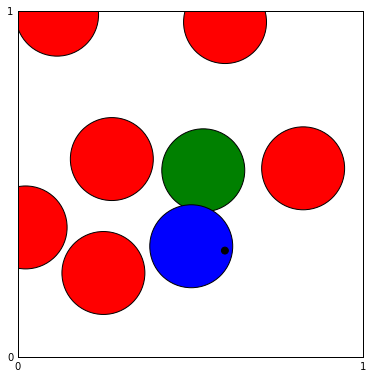

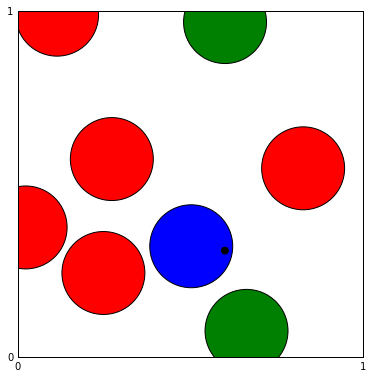

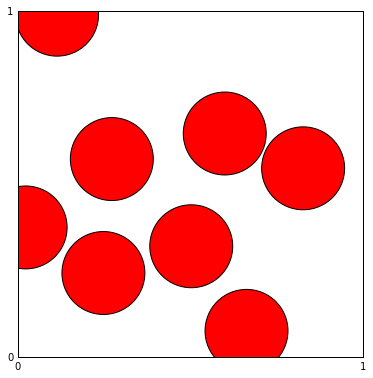

In [12]:
%matplotlib inline
import os, math, pylab, random

img = 0

def snapshot(pos, colors,pivot=[]):
    global img
    pylab.subplots_adjust(left=0.10, right=0.90, top=0.90, bottom=0.10)
    pylab.gcf().set_size_inches(6, 6)
    pylab.axis([0, 1, 0, 1])
    pylab.setp(pylab.gca(), xticks=[0, 1], yticks=[0, 1])
    for (x, y), c in zip(pos, colors):
        circle = pylab.Circle((x, y), radius=sigma, fc=c)
        pylab.gca().add_patch(circle)
    if pivot:
        circle = pylab.Circle((pivot[0], pivot[1]), radius=0.01, color='black')
        pylab.gca().add_patch(circle)
    pylab.show()
    pylab.close()
    img += 1

    
def distanceSquarePBC(A,B):
    dx = B[0]-A[0]
    if (abs(dx) > 0.5):
        if (A[0] < B[0]):
            dx -= 1.0
        else:
            dx += 1.0
    dy = B[1]-A[1]
    if (abs(dy) > 0.5):
        if (A[1] < B[1]):
            dy -= 1.0
        else:
            dy += 1.0
    return ((dx)**2 + (dy)**2)

def PBC(A):
    A[0]%=1.0
    A[1]%=1.0
        
def reflect(point, pivot):
    dx = pivot[0] - point[0]
    if (abs(dx) > 0.5):
        point[0] = pivot[0] + dx + 2.0
    else:
        point[0] = pivot[0] + dx
    
    dy = pivot[1] - point[1]
    if (abs(dy) > 0.5):
        point[1] = pivot[1] + dy + 2.0
    else:
        point[1] = pivot[1] + dy

        
def directRandomConf(conf, sigma, N):
    conf.append([random.uniform(0, 1), random.uniform(0, 1)])
    while len(conf) < N:                
        a = [random.uniform(0, 1), random.uniform(0, 1)]
        min_dist = min(distanceSquarePBC(b,a) for b in conf) 
        if not (min_dist <= 4.0 * sigma**2): 
            conf.append(a)

#def markovRandomConf(conf, sigma, N):
#    conf.append([random.uniform(0, 1), random.uniform(0, 1)]) ## get random point in box 1x1
#    while ( len(conf) < N ):
#        #snapshot(conf, colors)
#        testPos = [conf[-1][0] + random.uniform(-delta, delta), conf[-1][1] + random.uniform(-delta, delta)]
#        PBC(testPos);
#        noOverlap = True;
#        for pos in conf:
#            dist = distanceSquarePBC(pos, testPos)
#            if (dist <= 4.0*sigma**2):
#               noOverlap = False;
#                break;
#        if (noOverlap):
#            conf.append(testPos)            
            
conf = []
delta = 0.20
sigma = 0.12
#N = 4
#colors = ['r', 'b', 'g', 'orange']
N = 8
colors = ['r' for i in xrange(N)]
directRandomConf(conf, sigma, N)

n_steps = 1

for step in range(n_steps):
    colors = ['r' for i in xrange(N)]
    a = random.choice(conf) ## get random particle to move
    colors[conf.index(a)]='b'
    pivot = [a[0] + random.uniform(-delta, delta), a[1] + random.uniform(-delta, delta)] ## select pivot for point reflection move
    snapshot(conf, colors, pivot)
    pocket = [a] ## inser first moving particle in pocket
    chosen = [a] ## keeps track of what particles have been selected for cluster move
    while pocket:
        m = pocket.pop(0) ## get first particle from pocket
        reflect(m, pivot) ## do point reflection
        PBC(m) ## apply periodic boundary conditions
        for point in conf: ## now check for any overlaps
            if point in chosen: ## skip particles allready cohosen to cluster move
                continue
            dist = distanceSquarePBC(m, point) ## calculate nearest neaighbour distance in PBC
            if dist < 4.0 * sigma ** 2: ## check if there is overlap if so add particle to pocket
                colors[conf.index(point)]='g'
                pocket.append(point)
                chosen.append(point)
                snapshot(conf, colors, pivot)

## print configuration after N cluster moves
colors = ['r' for i in xrange(N)]
snapshot(conf, colors)

## TO SEE ANIMATION uncoment comented lines in main for cycle

**<font color='red'>Partially Correct  9/10 pts</font>**

I would like to see the circles overlap, instead of them being clipped by the boundary. But the implementation seems correct, and very fancy with the pivot symmetry :)